Importing libraries

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os, sys, glob
import gzip
import random
import tqdm
import json
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

from IPython import display
import matplotlib as mpl
from matplotlib import pyplot as plt
from google.colab import drive
from datetime import datetime

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()

from scipy.stats import probplot, boxcox
from scipy.special import inv_boxcox
import pylab

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import Ridge, Lasso, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor


In [3]:
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = '/content/drive/MyDrive/Colab_Notebooks/ML-Eyüp-012023/'

Mounted at /content/drive


In [4]:
data = pd.read_csv('{}apartments_for_rent_classified_10K.csv'.format(DATA_PATH),encoding='ISO-8859-1', sep=';')

data = data.sample(2000, random_state=42)
data.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
6252,5509158654,housing/rent/apartment,Lease Spacious 2+2. Approx 930 sf of Living Sp...,Come see all of the new and exciting improveme...,"Clubhouse,Gym,Parking,Patio/Deck,Storage,Tennis",2.0,2.0,USD,No,Yes,NaN,965,$965,Monthly,930,NaN,Durham,NC,36.0514,-78.8807,RentDigs.com,1568777002
4684,5668638788,housing/rent/apartment,Two BR 15 Union Street,"This unit is located at fifteen Union Street, ...",NaN,1.0,2.0,USD,No,Thumbnail,None,1875,"$1,875",Monthly,786,15 Union St,New Brunswick,NJ,40.4841,-74.4526,RentLingo,1577360262
1731,5668622404,housing/rent/apartment,Studio apartment 20-28 E Daniels,"This unit is located at 20-28 E Daniels, Cinci...","Cable or Satellite,Dishwasher,Garbage Disposal...",1.0,2.0,USD,No,Thumbnail,"Cats,Dogs",985,$985,Monthly,585,20-28 E Daniels,Cincinnati,OH,39.1679,-84.4933,RentLingo,1577359119
4742,5509154930,housing/rent/apartment,One BR - Welcome to Spring Creek of Edmond Apa...,"Square footage: 790 sq-ft, unit number: 320. W...","Fireplace,Garbage Disposal,Gym,Patio/Deck,Pool...",1.0,1.0,USD,No,Thumbnail,"Cats,Dogs",719,$719,Monthly,790,NaN,Edmond,OK,35.6217,-97.4702,RentDigs.com,1568776675
4521,5668635773,housing/rent/apartment,One BR 691 BLOOMFIELD AVENUE,"This unit is located at 691 BLOOMFIELD AVENUE,...",NaN,1.0,1.0,USD,No,Thumbnail,Cats,2250,"$2,250",Monthly,775,691 Bloomfield Ave,Montclair,NJ,40.8206,-74.2133,RentLingo,1577360064


In [5]:
print(f'Number of rows in the dataset: {data.shape[0]}')
print(f'Number of columns in the dataset: {data.shape[1]}')

Number of rows in the dataset: 2000
Number of columns in the dataset: 22


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 6252 to 6929
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2000 non-null   int64  
 1   category       2000 non-null   object 
 2   title          2000 non-null   object 
 3   body           2000 non-null   object 
 4   amenities      1301 non-null   object 
 5   bathrooms      1992 non-null   float64
 6   bedrooms       2000 non-null   float64
 7   currency       2000 non-null   object 
 8   fee            2000 non-null   object 
 9   has_photo      2000 non-null   object 
 10  pets_allowed   1665 non-null   object 
 11  price          2000 non-null   int64  
 12  price_display  2000 non-null   object 
 13  price_type     2000 non-null   object 
 14  square_feet    2000 non-null   int64  
 15  address        1337 non-null   object 
 16  cityname       1979 non-null   object 
 17  state          1979 non-null   object 
 18  latit

In [7]:
data.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,2.000000e+03,1992.000000,2000.000000,2000.000000,2000.000000,1995.000000,1995.000000,2.000000e+03
mean,5.624030e+09,1.376757,1.726000,1462.890500,947.293500,37.927308,-93.976139,1.574923e+09
std,6.993806e+07,0.609853,0.907378,943.424514,1007.486067,5.442771,15.548305,3.747364e+06
min,5.508654e+09,1.000000,0.000000,325.000000,101.000000,21.315500,-157.837900,1.568744e+09
25%,5.509256e+09,1.000000,1.000000,935.000000,645.750000,33.841950,-98.525300,1.568781e+09
50%,5.668583e+09,1.000000,2.000000,1246.500000,800.000000,38.941400,-93.302300,1.577356e+09
75%,5.668627e+09,2.000000,2.000000,1679.000000,1100.000000,41.602050,-81.583200,1.577359e+09
max,5.668663e+09,5.000000,6.000000,14950.000000,40000.000000,61.318600,-70.355900,1.577362e+09


create four new columns ('year', 'month', 'day_of_week', 'hour') that represent different time components of the 'time' attribute.

In [8]:
data['time'] = pd.to_datetime(data['time'])

# Extract different time-related features
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day_of_week'] = data['time'].dt.dayofweek
data['hour'] = data['time'].dt.hour

# Create 'is_weekend' feature
data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int)

# Display the updated DataFrame with the new features
print(data.head())




              id                category  \
6252  5509158654  housing/rent/apartment   
4684  5668638788  housing/rent/apartment   
1731  5668622404  housing/rent/apartment   
4742  5509154930  housing/rent/apartment   
4521  5668635773  housing/rent/apartment   

                                                  title  \
6252  Lease Spacious 2+2. Approx 930 sf of Living Sp...   
4684                             Two BR 15 Union Street   
1731                   Studio apartment 20-28 E Daniels   
4742  One BR - Welcome to Spring Creek of Edmond Apa...   
4521                       One BR 691 BLOOMFIELD AVENUE   

                                                   body  \
6252  Come see all of the new and exciting improveme...   
4684  This unit is located at fifteen Union Street, ...   
1731  This unit is located at 20-28 E Daniels, Cinci...   
4742  Square footage: 790 sq-ft, unit number: 320. W...   
4521  This unit is located at 691 BLOOMFIELD AVENUE,...   

                         

Binarization of categorical variables

has_photo

In [9]:

print(data['has_photo'].unique())


data['has_photo'] = data['has_photo'].map({'Thumbnail': 1, 'No': 0, 'Yes':1 })



['Yes' 'Thumbnail' 'No']


In [10]:
print(data['pets_allowed'].unique())


data['pets_allowed'] = data['pets_allowed'].map(lambda x: 0 if x == 'None' else 1)



[nan 'None' 'Cats,Dogs' 'Cats' 'Dogs']


In [11]:
print(data['fee'].unique())


data['fee'] = data['fee'].map(lambda x: 0 if x == 'No' else 1)



['No']


One-hot encoding

In [12]:
#  apply one-hot encoding
data = pd.get_dummies(data, columns=['category', 'source'], drop_first=True)

# Display the updated DataFrame with one-hot encoded columns
print(data.head())

              id                                              title  \
6252  5509158654  Lease Spacious 2+2. Approx 930 sf of Living Sp...   
4684  5668638788                             Two BR 15 Union Street   
1731  5668622404                   Studio apartment 20-28 E Daniels   
4742  5509154930  One BR - Welcome to Spring Creek of Edmond Apa...   
4521  5668635773                       One BR 691 BLOOMFIELD AVENUE   

                                                   body  \
6252  Come see all of the new and exciting improveme...   
4684  This unit is located at fifteen Union Street, ...   
1731  This unit is located at 20-28 E Daniels, Cinci...   
4742  Square footage: 790 sq-ft, unit number: 320. W...   
4521  This unit is located at 691 BLOOMFIELD AVENUE,...   

                                              amenities  bathrooms  bedrooms  \
6252    Clubhouse,Gym,Parking,Patio/Deck,Storage,Tennis        2.0       2.0   
4684                                                NaN   

Check missing values


In [13]:
data.isna().sum()

id                              0
title                           0
body                            0
amenities                     699
bathrooms                       8
bedrooms                        0
currency                        0
fee                             0
has_photo                       0
pets_allowed                    0
price                           0
price_display                   0
price_type                      0
square_feet                     0
address                       663
cityname                       21
state                          21
latitude                        5
longitude                       5
time                            0
year                            0
month                           0
day_of_week                     0
hour                            0
is_weekend                      0
category_housing/rent/home      0
source_Home Rentals             0
source_Listanza                 0
source_ListedBuy                0
source_RENTCaf

Distribution of rent prices

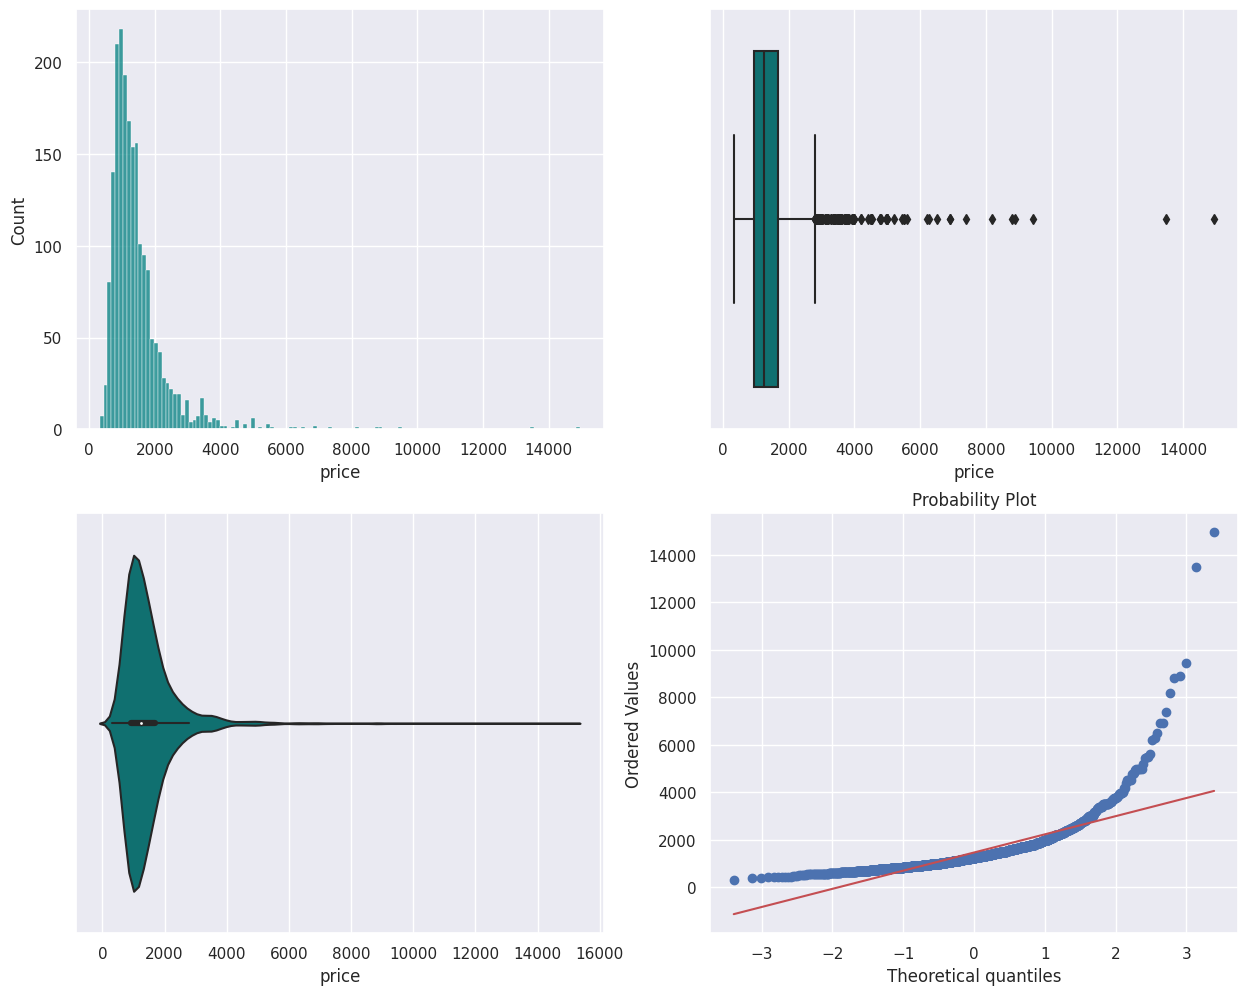

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))
ax1 = sns.histplot(x = data['price'], color='teal', ax= ax[0, 0])
ax2 = sns.boxplot(x = data['price'], ax= ax[0, 1], color= 'teal')
ax3 = sns.violinplot(x = data['price'], ax= ax[1, 0], color= 'teal')
ax4 = probplot(data['price'], plot=pylab)
pylab.show()

Drop columns that have missing values



In [15]:
# Define the list of columns to drop
columns_to_drop = ['amenities', 'pets_allowed', 'address',"time","price_display","title","body","currency","id","state","cityname","price_type"]

# Drop the columns with a high number of missing values
data = data.drop(columns=columns_to_drop)

# Display the updated DataFrame
print(data.head())

      bathrooms  bedrooms  fee  has_photo  price  square_feet  latitude  \
6252        2.0       2.0    0          1    965          930   36.0514   
4684        1.0       2.0    0          1   1875          786   40.4841   
1731        1.0       2.0    0          1    985          585   39.1679   
4742        1.0       1.0    0          1    719          790   35.6217   
4521        1.0       1.0    0          1   2250          775   40.8206   

      longitude  year  month  day_of_week  hour  is_weekend  \
6252   -78.8807  1970      1            3     0           0   
4684   -74.4526  1970      1            3     0           0   
1731   -84.4933  1970      1            3     0           0   
4742   -97.4702  1970      1            3     0           0   
4521   -74.2133  1970      1            3     0           0   

      category_housing/rent/home  source_Home Rentals  source_Listanza  \
6252                           0                    0                0   
4684                  

Split data into test and training

In [16]:
data = data.dropna()

X = data.drop('square_feet', axis= 1)
y = data['square_feet']

bc_result = boxcox(y)
y_boxcox = bc_result[0]
lambda_ = bc_result[1]

X_train, X_test, y_train, y_test = train_test_split(X, y_boxcox, test_size= 0.2, random_state = 42)


data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 6252 to 6929
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   bathrooms                   1987 non-null   float64
 1   bedrooms                    1987 non-null   float64
 2   fee                         1987 non-null   int64  
 3   has_photo                   1987 non-null   int64  
 4   price                       1987 non-null   int64  
 5   square_feet                 1987 non-null   int64  
 6   latitude                    1987 non-null   float64
 7   longitude                   1987 non-null   float64
 8   year                        1987 non-null   int64  
 9   month                       1987 non-null   int64  
 10  day_of_week                 1987 non-null   int64  
 11  hour                        1987 non-null   int64  
 12  is_weekend                  1987 non-null   int64  
 13  category_housing/rent/home  19

Predictions

Method 1: Random Forest Regressor

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [18]:
X_train


,bathrooms,bedrooms,fee,has_photo,price,latitude,longitude,year,month,day_of_week,hour,is_weekend,category_housing/rent/home,source_Home Rentals,source_Listanza,source_ListedBuy,source_RENTCafé,source_RENTOCULAR,source_RealRentals,source_RentDigs.com,source_RentLingo,source_rentbits
6492,1.0,1.0,0,0,953,33.6795,-84.1596,1970,1,3,0,0,0,0,0,0,0,0,0,1,0,0
9053,2.0,2.0,0,1,2150,29.4624,-98.5253,1970,1,3,0,0,0,0,0,0,0,0,0,0,1,0
9100,2.0,3.0,0,1,1570,40.4678,-79.9134,1970,1,3,0,0,0,0,0,0,0,0,0,1,0,0
5028,1.5,2.0,0,1,563,33.4632,-94.0736,1970,1,3,0,0,0,0,0,0,0,0,0,1,0,0
239,1.0,0.0,0,1,1099,45.5091,-122.6449,1970,1,3,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7962,1.0,2.0,0,1,1220,39.0744,-94.5521,1970,1,3,0,0,0,0,0,0,0,0,0,0,1,0
3846,1.0,1.0,0,0,2235,34.1428,-117.9996,1970,1,3,0,0,0,0,0,0,0,0,0,1,0,0
8961,2.0,3.0,0,1,1300,33.9217,-84.8634,1970,1,3,0,0,0,0,0,0,0,0,0,0,1,0
2611,1.0,1.0,0,1,820,35.7863,-78.4845,1970,1,3,0,0,0,0,0,0,0,0,0,1,0,0


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Step 1: Create a RandomForestRegressor instance
rf_regressor = RandomForestRegressor()

# Step 2: Define the hyperparameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],

}

# Step 3: Perform Grid Search using cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 4: Train the Random Forest model with the best hyperparameters
best_rf_model = grid_search.best_estimator_

best_rf_model


RandomForestRegressor(max_depth=10, n_estimators=200)

In [20]:
# Step 1: Create a RandomForestRegressor instance
rf_regressor = RandomForestRegressor()

# Step 2: Define the hyperparameter grid for Grid Search
param_grid = {
    'n_estimators':  [200],
    'max_depth': [10],
   'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],

}

# Step 3: Perform Grid Search using cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 4: Train the Random Forest model with the best hyperparameters
best_rf_model = grid_search.best_estimator_

best_rf_model




RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=200)

In [21]:
# Step 1: Create a RandomForestRegressor instance
rf_regressor = RandomForestRegressor()

# Step 2: Define the hyperparameter grid for Grid Search
param_grid = {
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False],
    'n_estimators':  [200],
    'max_depth': [10],

    'min_samples_leaf': [2],

}

# Step 3: Perform Grid Search using cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 4: Train the Random Forest model with the best hyperparameters
best_rf_model = grid_search.best_estimator_

print(best_rf_model.bootstrap)
print(best_rf_model.min_samples_split)



True
2


In [22]:

rf_regressor = RandomForestRegressor()

param_grid = {
    'n_estimators':  [200],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
    'bootstrap': [True],
}

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)


best_rf_model = grid_search.best_estimator_

best_rf_model

y_pred = best_rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.02311988327729601


Method 2: Gradient Boosting Regressor

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Step 1: Create a GradientBoostingRegressor instance
gb_regressor = GradientBoostingRegressor()

# Step 2: Define the hyperparameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],

}

# Step 3: Perform Grid Search using cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 4: Train the Gradient Boosting model with the best hyperparameters
best_gb_model = grid_search.best_estimator_
best_gb_model


GradientBoostingRegressor(learning_rate=0.2, n_estimators=50)

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Step 1: Create a GradientBoostingRegressor instance
gb_regressor = GradientBoostingRegressor()

# Step 2: Define the hyperparameter grid for Grid Search
param_grid = {
    'n_estimators': [50],
    'learning_rate': [ 0.2],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10],

}

# Step 3: Perform Grid Search using cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 4: Train the Gradient Boosting model with the best hyperparameters
best_gb_model = grid_search.best_estimator_
best_gb_model

GradientBoostingRegressor(learning_rate=0.2, min_samples_split=10,
                          n_estimators=50)

In [34]:
best_gb_model.max_depth

3

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


gb_regressor = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [50],
    'learning_rate': [ 0.2],
    'max_depth': [3],
    'min_samples_split': [10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_gb_model = grid_search.best_estimator_
y_pred = best_gb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.022290325134393746


Method 3: SVM (Support Vector Machines)

In [24]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Step 1: Create an SVR (Support Vector Regressor) instance
svm_regressor = SVR()

# Step 2: Define the hyperparameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],

}

# Step 3: Perform Grid Search using cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=svm_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 4: Train the SVR model with the best hyperparameters
best_svm_model = grid_search.best_estimator_



In [25]:
best_svm_model

SVR(C=10, kernel='poly')

In [28]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Step 1: Create an SVR (Support Vector Regressor) instance
svm_regressor = SVR()

# Step 2: Define the hyperparameter grid for Grid Search
param_grid = {
    'C': [10],
    'kernel': ['poly'],
    'gamma': ['scale', 'auto', 0.1, 0.01],
}

# Step 3: Perform Grid Search using cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=svm_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 4: Train the SVR model with the best hyperparameters
best_svm_model = grid_search.best_estimator_
best_svm_model

'scale'

In [29]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


svm_regressor = SVR()


param_grid = {
    'C': [10],
    'kernel': ['poly'],
    'gamma': ['scale'],
}

grid_search = GridSearchCV(estimator=svm_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.06140033616603359



The culmination of our machine learning project has led us to identify the Gradient Boosting Regressor as the most effective predictive model, outshining its competitors, namely Random Forest and Support Vector Machine (SVM). The model's remarkable performance is evident from its consistently low Mean Squared Error (MSE), indicating its ability to accurately capture complex relationships within the dataset. Through meticulous hyperparameter tuning and ensemble techniques, the Gradient Boosting Regressor demonstrated its superiority by delivering precise predictions and minimizing overfitting. The implications of this achievement extend to various domains, empowering decision-makers with valuable insights and bolstering data-driven initiatives. This successful endeavor highlights the potential of sophisticated machine learning techniques in addressing real-world challenges and signifies a significant step towards a future where data-driven innovation and progress flourish.





